In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from IPython.display import clear_output
warnings.filterwarnings('ignore')

### Data loading

In [2]:
district_data = pd.read_csv('../data/raw/district.csv', dtype='str')
district_data.head(2)

,district_id,name_chinese,name_english,city_id
0,00101,海淀区,HaiDianQu,001
1,00102,石景山区,ShiJingShanQu,001


In [3]:
# City id is 1 for Beijing
beijing_districts = district_data[district_data.city_id=='001']['district_id']
beijing_districts

0     00101
1     00102
2     00103
3     00104
4     00105
5     00106
6     00107
7     00108
8     00109
9     00110
10    00111
11    00112
12    00113
13    00114
14    00115
15    00116
Name: district_id, dtype: object

35 stations (in the 16 districts)

In [4]:
station_data = pd.read_csv('../data/raw/station.csv', dtype='str')

beijing_stations = station_data[station_data.district_id.isin(beijing_districts)]
beijing_stations

,station_id,name_chinese,name_english,latitude,longitude,district_id
0,001001,海淀北部新区,HaiDianBeiBuXinQu,40.090679,116.173553,00101
1,001002,海淀北京植物园,HaiDianBeiJingZhiWuYuan,40.003950,116.205310,00101
2,001003,石景山古城,ShiJingShanGuCheng,39.914409,116.184239,00102
3,001004,丰台云岗,FengTaiYunGang,39.815128,116.171150,00103
4,001005,房山良乡,FangShanLiangXiang,39.742767,116.136045,00104
5,001006,海淀万柳,HaiDianWanLiu,39.987313,116.287451,00101
6,001007,朝阳奥体中心,ChaoYangAoTiZhongXin,39.982053,116.397400,00105
7,001008,西直门北大街,XiZhiMenBeiDaJie,39.954047,116.348991,00101
8,001009,西城万寿西宫,XiChengWanShouXiGong,39.878193,116.351974,00106
9,001010,永定门内大街,YongDingMenNeiDaJie,39.876184,116.394009,00103


### The study area: 36 stations, 100 mi^2

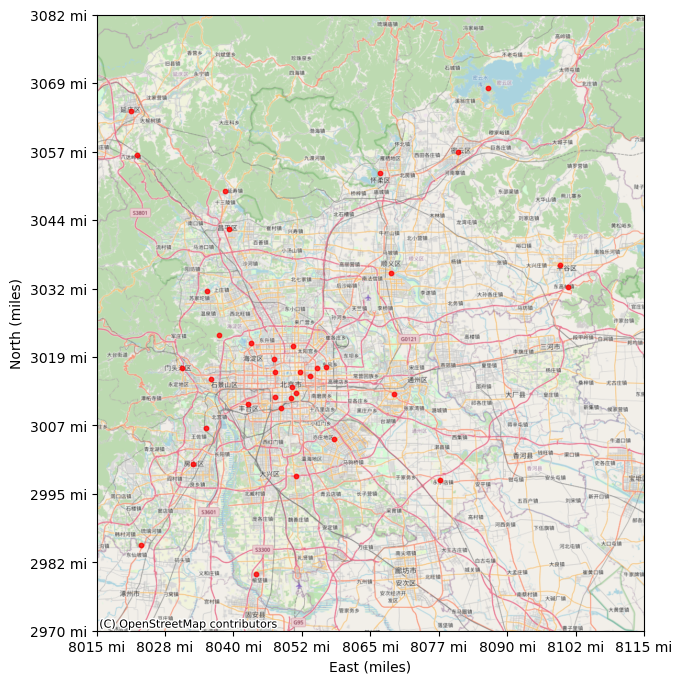

In [32]:
from shapely import Point
import geopandas as gpd
import contextily as ctx

beijing_stations['geo'] = beijing_stations.apply(lambda x: Point(x['longitude'], x['latitude']), axis=1)

bs_geo = gpd.GeoDataFrame(beijing_stations, geometry='geo', crs='EPSG:4326')

# Reproject todi Web Mercator (OSM default)
bs_geo = bs_geo.to_crs("EPSG:3857")

# plot with basemap
fig, ax = plt.subplots(figsize=(10,8))
bs_geo.plot(ax=ax, color='red', alpha=0.8, markersize=10)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Set axis labels in kilometers
ax.set_xlabel("East (miles)")
ax.set_ylabel("North (miles)")
ax.set_xticks(ax.get_xticks())
ax.set_yticks(ax.get_yticks())
ax.set_xticklabels([f"{int(x / 1609.34)} mi" for x in ax.get_xticks()])
ax.set_yticklabels([f"{int(y / 1609.34)} mi" for y in ax.get_yticks()])

plt.show()

In [36]:
beijing_stations.drop(columns=['geo']).to_csv('tmp_beijing_stations.csv.gz', index=None)

In [67]:
aq_data = pd.read_csv('../data/raw/airquality.csv.gz', dtype='str')
aq_data.head(2)

,station_id,time,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration
0,001001,2014-05-01 00:00:00,138,159.4,56.3,0.9,50.8,17.2
1,001001,2014-05-01 01:00:00,124,163.9,38.7,0.9,51.1,17.9


In [38]:
len(aq_data)

2891393

### This looks like hourly AQ data, for 1 year..

In [41]:
24*365

8760

In [68]:
beijing_aq = aq_data[aq_data.station_id.isin(beijing_stations.station_id)]
beijing_aq.describe()

,station_id,time,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration
count,278023,278023,273553,173243,264854,267720,266657,267283
unique,36,8571,670,5600,2353,161,3141,1678
top,001003,2015-04-30 16:00:00,3,5,2,0.3,2,2
freq,8298,36,4650,1610,4731,22178,31387,49551


### looks like there is some missing data (where station_id count != 36)

In [73]:
beijing_aq.groupby(by='time').count()

,station_id,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration,day
time,,,,,,,,
2014-05-01 00:00:00,36,35,33,35,35,35,35,36
2014-05-01 01:00:00,36,36,35,35,35,35,34,36
2014-05-01 02:00:00,36,36,34,35,34,35,34,36
2014-05-01 03:00:00,36,36,35,35,33,34,33,36
2014-05-01 04:00:00,36,36,35,34,33,34,35,36
...,...,...,...,...,...,...,...,...
2015-04-30 18:00:00,36,35,32,35,35,35,35,36
2015-04-30 19:00:00,36,35,34,35,35,35,35,36
2015-04-30 20:00:00,36,35,33,35,35,35,35,36


<Axes: xlabel='day'>

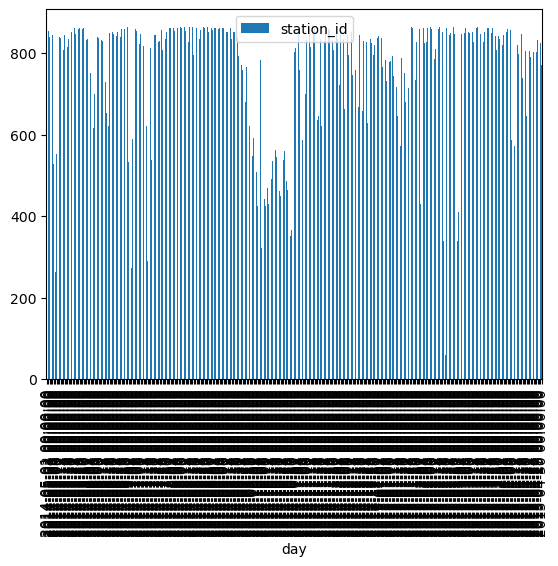

In [ ]:
# group by day
beijing_aq['day'] = pd.to_datetime(beijing_aq['time'].apply(lambda x: x.split(' ')[0]))

stations_time_counts = beijing_aq.groupby(beijing_aq['day']).count().reset_index()[['day', 'station_id']]
stations_time_counts.plot(x='day', y='station_id', kind='bar')
#plt.plot(stations_time_counts)

### Meteoroligical data is by district (not station)

In [42]:
met_data = pd.read_csv('../data/raw/meteorology.csv.gz', dtype='str')
met_data.head(2)

,id,time,weather,temperature,pressure,humidity,wind_speed,wind_direction
0,001,2014-05-01 02:00:00,NaN,18,755.9,71,2,23
1,001,2014-05-01 05:00:00,NaN,16.8,755.8,78,1,13


In [75]:
beijing_met = met_data[met_data.id.isin(beijing_districts)]
beijing_met.head(2)

,id,time,weather,temperature,pressure,humidity,wind_speed,wind_direction
6189,00101,2014-05-01 00:00:00,0,20,1004,56,7.92,13
6190,00101,2014-05-01 01:00:00,0,18,1004,64,7.56,13


In [44]:
beijing_met.groupby(by='time').count()

,id,weather,temperature,pressure,humidity,wind_speed,wind_direction
time,,,,,,,
2014-05-01 00:00:00,16,16,16,16,16,16,16
2014-05-01 01:00:00,16,16,16,16,16,15,16
2014-05-01 02:00:00,16,16,16,16,16,16,16
2014-05-01 03:00:00,16,16,16,16,16,16,16
2014-05-01 04:00:00,16,16,16,16,16,16,16
...,...,...,...,...,...,...,...
2015-04-30 18:00:00,14,14,14,9,14,14,14
2015-04-30 19:00:00,14,14,14,9,14,14,14
2015-04-30 20:00:00,14,14,14,9,14,14,14


### lots of weird inconsitencies

In [76]:
beijing_met.groupby('id').count()

,time,weather,temperature,pressure,humidity,wind_speed,wind_direction
id,,,,,,,
00101,7010,6787,7007,2092,6977,4640,6970
00102,7432,7211,7429,2092,7399,5054,7338
00103,7422,7201,7419,2092,7389,5042,7363
00104,7585,7362,7546,7339,7580,7497,7585
00105,7514,7294,7187,7288,7485,7426,7507
00106,2997,2995,2994,2994,2994,2986,2997
00107,2997,2995,2994,2994,2994,2986,2997
00108,7603,7382,7564,7364,7574,7487,7586
00109,7369,7151,7368,2094,7337,4995,7346


## Combining

In [77]:
beijing_aq_with_dist = pd.merge(beijing_aq, beijing_stations, )
beijing_aq_with_dist.shape, beijing_aq.shape

((278023, 15), (278023, 9))

In [11]:
beijing_aq_with_dist.head(2)

,station_id,time,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration,name_chinese,name_english,latitude,longitude,district_id
0,001001,2014-05-01 00:00:00,138,159.4,56.3,0.9,50.8,17.2,海淀北部新区,HaiDianBeiBuXinQu,40.090679,116.173553,00101
1,001001,2014-05-01 01:00:00,124,163.9,38.7,0.9,51.1,17.9,海淀北部新区,HaiDianBeiBuXinQu,40.090679,116.173553,00101


In [78]:
date_index = pd.date_range('2014-05-01 00:00:00', '2015-04-30 23:00:00', freq='H')
station_index = beijing_aq.station_id.unique()

combo_df = pd.DataFrame(index=pd.MultiIndex.from_product([date_index, station_index], 
                                                         names=['time', 'station_id']))

combo_df = combo_df.reset_index()
beijing_stations2 = beijing_stations.set_index('station_id')
combo_df['longitude'] = combo_df['station_id'].apply(lambda x: beijing_stations2.loc[x, 'longitude'])
combo_df['latitude'] = combo_df['station_id'].apply(lambda x: beijing_stations2.loc[x, 'latitude'])

combo_df = combo_df.set_index(['time', 'station_id'])
combo_df.head(2)

longitude   latitude
time       station_id                       
2014-05-01 001001      116.173553  40.090679
           001002      116.205310  40.003950

In [79]:
beijing_aq['time'] = pd.to_datetime(beijing_aq['time'])
beijing_aq2 = beijing_aq.set_index(['time', 'station_id'])
beijing_aq2.head(2)

,,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration,day
time,station_id,,,,,,,
2014-05-01 00:00:00,001001,138,159.4,56.3,0.9,50.8,17.2,2014-05-01
2014-05-01 01:00:00,001001,124,163.9,38.7,0.9,51.1,17.9,2014-05-01


### Merging AQ data to global df

In [80]:
for col in beijing_aq2.columns:
    combo_df[col] = beijing_aq2[col]

combo_df

longitude   latitude PM25_Concentration  \
time                station_id                                             
2014-05-01 00:00:00 001001      116.173553  40.090679                138   
                    001002      116.205310  40.003950                 89   
                    001003      116.184239  39.914409                105   
                    001004      116.171150  39.815128                 98   
                    001005      116.136045  39.742767                109   
...                                    ...        ...                ...   
2015-04-30 23:00:00 001032      116.911000  40.499000                NaN   
                    001033      117.120000  40.100000                NaN   
                    001034      116.783000  39.712000                NaN   
                    001035      116.300000  39.520000                NaN   
                    001036      116.000000  39.579999                NaN   

                               PM10_Concentration NO2_Concentration  \
time                station_id                                        
2014-05-01 00:00:00 001001                  159.4              56.3   
                    001002                  132.9              30.5   
                    001003                  196.4              79.9   
                    001004                  159.9              44.8   
                    001005                  112.9                51   
...                                           ...               ...   
2015-04-30 23:00:00 001032                    NaN               NaN   
                    001033                    NaN               NaN   
                    001034                    NaN               NaN   
                    001035                    NaN               NaN   
                    001036                    NaN               NaN   

                               CO_Concentration O3_Concentration  \
time                station_id                                     
2014-05-01 00:00:00 001001                  0.9             50.8   
                    001002                  0.8             96.5   
                    001003                  0.8             75.7   
                    001004                  0.9            105.4   
                    001005                  0.9               86   
...                                         ...              ...   
2015-04-30 23:00:00 001032                  NaN              NaN   
                    001033                  NaN              NaN   
                    001034                  NaN              NaN   
                    001035                  NaN              NaN   
                    001036                  NaN              NaN   

                               SO2_Concentration        day  
time                station_id                               
2014-05-01 00:00:00 001001                  17.2 2014-05-01  
                    001002                   7.6 2014-05-01  
                    001003                   9.1 2014-05-01  
                    001004                  13.2 2014-05-01  
                    001005                   7.3 2014-05-01  
...                                          ...        ...  
2015-04-30 23:00:00 001032                   NaN        NaT  
                    001033                   NaN        NaT  
                    001034                   NaN        NaT  
                    001035                   NaN        NaT  
                    001036                   NaN        NaT  

[315360 rows x 9 columns]

### Merging Meteorological data in global df

In [81]:
beijing_met2 = beijing_met.rename(columns={'id': 'district_id'})
beijing_met2['time'] = pd.to_datetime(beijing_met2['time'])
beijing_met2.head(2)
beijing_met_with_station = pd.merge(beijing_met2, beijing_stations).drop(columns=['district_id', 'name_chinese', 
                                                                                  'name_english', 'latitude', 'longitude'])
beijing_met_with_station2 = beijing_met_with_station.set_index(['time', 'station_id'])
beijing_met_with_station2

weather temperature pressure humidity  \
time                station_id                                         
2014-05-01 00:00:00 001001           0          20     1004       56   
                    001002           0          20     1004       56   
                    001006           0          20     1004       56   
                    001008           0          20     1004       56   
2014-05-01 01:00:00 001001           0          18     1004       64   
...                                ...         ...      ...      ...   
2015-04-30 20:00:00 001031           4          22      954       51   
2015-04-30 22:00:00 001029           4        21.3      954       54   
                    001031           4        21.3      954       54   
2015-04-30 23:00:00 001029           1        17.9      955       76   
                    001031           1        17.9      955       76   

                               wind_speed wind_direction  \
time                station_id                             
2014-05-01 00:00:00 001001           7.92             13   
                    001002           7.92             13   
                    001006           7.92             13   
                    001008           7.92             13   
2014-05-01 01:00:00 001001           7.56             13   
...                                   ...            ...   
2015-04-30 20:00:00 001031            2.7             13   
2015-04-30 22:00:00 001029            1.6             13   
                    001031            1.6             13   
2015-04-30 23:00:00 001029            1.5             14   
                    001031            1.5             14   

                                                         geo  
time                station_id                                
2014-05-01 00:00:00 001001      POINT (116.173553 40.090679)  
                    001002        POINT (116.20531 40.00395)  
                    001006      POINT (116.287451 39.987313)  
                    001008      POINT (116.348991 39.954047)  
2014-05-01 01:00:00 001001      POINT (116.173553 40.090679)  
...                                                      ...  
2015-04-30 20:00:00 001031            POINT (115.988 40.365)  
2015-04-30 22:00:00 001029         POINT (115.971999 40.453)  
                    001031            POINT (115.988 40.365)  
2015-04-30 23:00:00 001029         POINT (115.971999 40.453)  
                    001031            POINT (115.988 40.365)  

[245812 rows x 7 columns]

In [82]:
for col in beijing_met_with_station2.columns:
    combo_df[col] = beijing_met_with_station2[col]

combo_df

longitude   latitude PM25_Concentration  \
time                station_id                                             
2014-05-01 00:00:00 001001      116.173553  40.090679                138   
                    001002      116.205310  40.003950                 89   
                    001003      116.184239  39.914409                105   
                    001004      116.171150  39.815128                 98   
                    001005      116.136045  39.742767                109   
...                                    ...        ...                ...   
2015-04-30 23:00:00 001032      116.911000  40.499000                NaN   
                    001033      117.120000  40.100000                NaN   
                    001034      116.783000  39.712000                NaN   
                    001035      116.300000  39.520000                NaN   
                    001036      116.000000  39.579999                NaN   

                               PM10_Concentration NO2_Concentration  \
time                station_id                                        
2014-05-01 00:00:00 001001                  159.4              56.3   
                    001002                  132.9              30.5   
                    001003                  196.4              79.9   
                    001004                  159.9              44.8   
                    001005                  112.9                51   
...                                           ...               ...   
2015-04-30 23:00:00 001032                    NaN               NaN   
                    001033                    NaN               NaN   
                    001034                    NaN               NaN   
                    001035                    NaN               NaN   
                    001036                    NaN               NaN   

                               CO_Concentration O3_Concentration  \
time                station_id                                     
2014-05-01 00:00:00 001001                  0.9             50.8   
                    001002                  0.8             96.5   
                    001003                  0.8             75.7   
                    001004                  0.9            105.4   
                    001005                  0.9               86   
...                                         ...              ...   
2015-04-30 23:00:00 001032                  NaN              NaN   
                    001033                  NaN              NaN   
                    001034                  NaN              NaN   
                    001035                  NaN              NaN   
                    001036                  NaN              NaN   

                               SO2_Concentration        day weather  \
time                station_id                                        
2014-05-01 00:00:00 001001                  17.2 2014-05-01       0   
                    001002                   7.6 2014-05-01       0   
                    001003                   9.1 2014-05-01       0   
                    001004                  13.2 2014-05-01       0   
                    001005                   7.3 2014-05-01       0   
...                                          ...        ...     ...   
2015-04-30 23:00:00 001032                   NaN        NaT       1   
                    001033                   NaN        NaT       1   
                    001034                   NaN        NaT       0   
                    001035                   NaN        NaT       1   
                    001036                   NaN        NaT       1   

                               temperature pressure humidity wind_speed  \
time                station_id                                            
2014-05-01 00:00:00 001001              20     1004       56       7.92   
                    001002              20     1004       56       7.92   
           

In [85]:
combo_df = combo_df.drop(columns=['geo'])

In [86]:
combo_df.reset_index().to_csv('tmp_beijing_aq_plus_met.csv.gz', index=None)